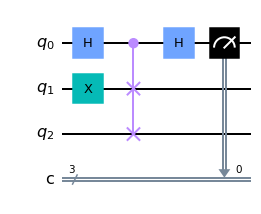

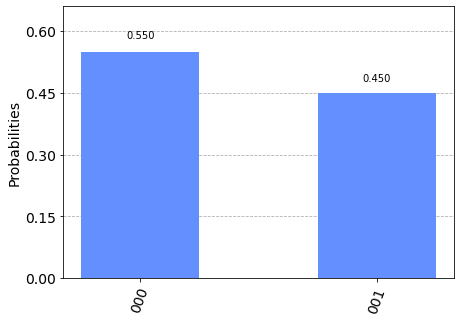

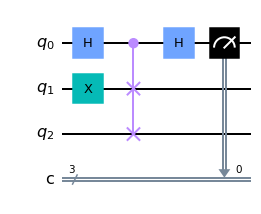

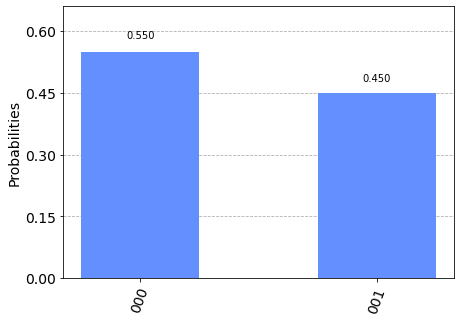

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, visualization, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from numpy import pi

import matplotlib.pyplot as plt

# cgecking state fidelity F(q1,q2)
# c0 is 100% if c1=c2 and 50% if c1<>c2

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.cswap(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[0])

circuit.measure(qreg_q[0], creg_c[0])

display(circuit.draw(output="mpl"))




# Drawing the histogram

backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=100)
result = job.result()
counts = result.get_counts(circuit)


graph = visualization.plot_histogram(counts)

display(graph)

